In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('cleaned_amazon_delivery.csv')
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,5,3,1,11,0
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,4,3,0,19,1
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,5,3,1,8,1
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,4,0,18,1
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,5,3,1,13,0


In [19]:
df["traffic_weather"] = df["Traffic"].astype(str) + "_" + df["Weather"].astype(str)
df["vehicle_traffic"] = df["Vehicle"].astype(str) + "_" + df["Traffic"].astype(str)

In [20]:
df['vehicle_category'] = df["Vehicle"].astype(str) + "_" + df["Category"].astype(str)

In [21]:
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour,traffic_weather,vehicle_traffic,vehicle_category
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,5,3,1,11,0,High _Sunny,motorcycle _High,motorcycle _Clothing
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,4,3,0,19,1,Jam _Stormy,scooter _Jam,scooter _Electronics
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,5,3,1,8,1,Low _Sandstorms,motorcycle _Low,motorcycle _Sports
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,4,0,18,1,Medium _Sunny,motorcycle _Medium,motorcycle _Cosmetics
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,5,3,1,13,0,High _Cloudy,scooter _High,scooter _Toys


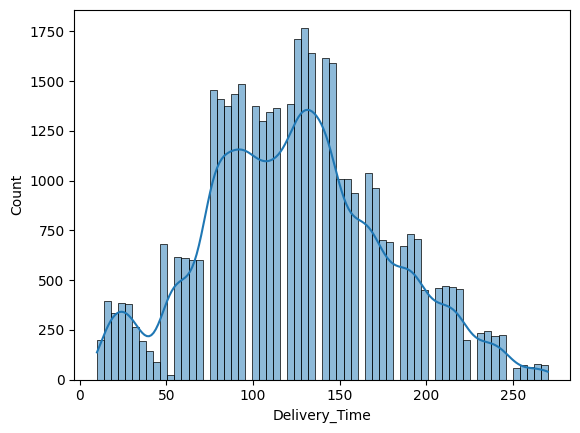

In [9]:
sns.histplot(data=df, x='Delivery_Time', kde=True)
plt.show()

In [23]:
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour,traffic_weather,vehicle_traffic,vehicle_category
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,5,3,1,11,0,High _Sunny,motorcycle _High,motorcycle _Clothing
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,4,3,0,19,1,Jam _Stormy,scooter _Jam,scooter _Electronics
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,5,3,1,8,1,Low _Sandstorms,motorcycle _Low,motorcycle _Sports
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,4,0,18,1,Medium _Sunny,motorcycle _Medium,motorcycle _Cosmetics
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,5,3,1,13,0,High _Cloudy,scooter _High,scooter _Toys


In [28]:
X = df.drop(columns=['Delivery_Time'])
y = df['Delivery_Time']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape)

(31997, 16)


In [37]:
cat_cols = ['Weather','Traffic','Vehicle','Area','Category','traffic_weather','vehicle_traffic','vehicle_category']
# Make sure every name in this list appears in X_train.columns

In [39]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

trf1 = ColumnTransformer([
    ('one_hot_vector', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'),cat_cols)
], remainder='passthrough')

In [50]:
# Step 1: Fit the one-hot encoder (trf1) on training data
trf1.fit(X_train)

# Step 2: Transform training data into numeric form
X_transformed = trf1.transform(X_train)

# Step 3: Get feature names (after one-hot encoding + passthrough)
feature_names = trf1.get_feature_names_out()

print("Number of transformed features:", len(feature_names))
print("First 10 features:", feature_names[:10])

# Step 4: Fit SelectKBest on numeric transformed data
from sklearn.feature_selection import SelectKBest, f_regression
trf3 = SelectKBest(score_func=f_regression, k=70)
trf3.fit(X_transformed, y_train)

# Step 5: Create DataFrame with scores
import pandas as pd
feat_scores = pd.DataFrame({
    "Feature": feature_names,
    "Score": trf3.scores_,
    "pValue": trf3.pvalues_,
    "Selected": trf3.get_support()
}).sort_values(by="Score", ascending=False)

print(feat_scores.head(10))   # top 20 features

Number of transformed features: 117
First 10 features: ['one_hot_vector__Weather_Fog' 'one_hot_vector__Weather_Sandstorms'
 'one_hot_vector__Weather_Stormy' 'one_hot_vector__Weather_Sunny'
 'one_hot_vector__Weather_Windy' 'one_hot_vector__Traffic_Jam '
 'one_hot_vector__Traffic_Low ' 'one_hot_vector__Traffic_Medium '
 'one_hot_vector__Vehicle_scooter ' 'one_hot_vector__Vehicle_van']
                                               Feature         Score  pValue  \
17                    one_hot_vector__Category_Grocery  10013.676498     0.0   
66   one_hot_vector__vehicle_category_motorcycle _G...   4893.984039     0.0   
6                         one_hot_vector__Traffic_Low    3864.547699     0.0   
110                            remainder__Agent_Rating   3337.676672     0.0   
5                         one_hot_vector__Traffic_Jam    3082.298698     0.0   
82   one_hot_vector__vehicle_category_scooter _Grocery   2708.195383     0.0   
51    one_hot_vector__vehicle_traffic_motorcycle _Jam 

In [51]:
selected_mask = trf3.get_support()
X_selected = X_transformed[:, selected_mask]
print("Final training shape:", X_selected.shape)

Final training shape: (31997, 70)


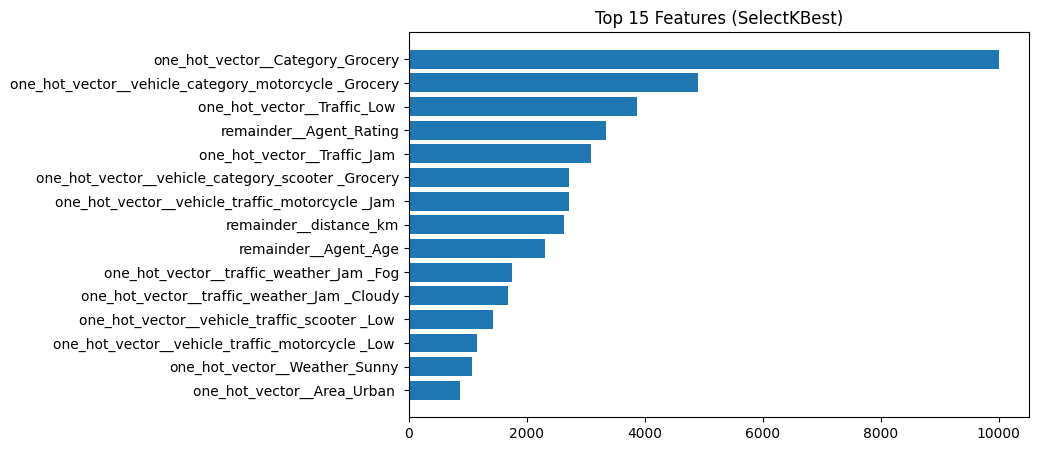

In [52]:
import matplotlib.pyplot as plt
top_feats = feat_scores.nlargest(15, "Score")
plt.figure(figsize=(8,5))
plt.barh(top_feats["Feature"], top_feats["Score"])
plt.gca().invert_yaxis()
plt.title("Top 15 Features (SelectKBest)")
plt.show()

In [59]:
# Save your feature scores to a CSV file
feat_scores.to_csv("feat_scores.csv", index=False)

print("File saved successfully at:", os.path.abspath("feat_scores.csv"))

File saved successfully at: C:\Users\Deepam Shah\Jupyter Notebook Python-20250329T150948Z-001\Jupyter Notebook Python\Artificial Intelligence\Machine Learning\Projects_19\Amazon Delievery Time Prediction\feat_scores.csv


In [60]:
import mlflow

# 1) use a short mlruns folder on C: (or any short path)
mlflow.set_tracking_uri("file:///C:/mlruns")  

# 2) set or create experiment (optional artifact_location)
mlflow.set_experiment("delivery_time_prediction")

# then run your evaluate_and_log(...) code as before
# and when logging the model prefer the 'name' parameter:
# mlflow.sklearn.log_model(pipe, name="decision_tree_pipeline")

<Experiment: artifact_location='file:///C:/mlruns/251885329141119202', creation_time=1759561412552, experiment_id='251885329141119202', last_update_time=1759561412552, lifecycle_stage='active', name='delivery_time_prediction', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [61]:
with mlflow.start_run(run_name="feature_selection_kbest"):
    mlflow.log_param("num_features_selected", 70)
    mlflow.log_artifact("feat_scores.csv")  